## Angelito Aragon
## CSCE 623: Project


In [111]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
#make plots inline using jupyter magic
%matplotlib inline 

import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn import datasets, linear_model, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, r2_score
from sklearn.model_selection import train_test_split, KFold

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

## Step 1: Load Data from CSV

In [112]:
#Read from CSV
master_df = pd.DataFrame(pd.read_csv("D:\\master", dtype={'Protocol':object, 'Length':int, 'Duration':object}))
wifi_df = master_df.loc[master_df['Protocol']=='802.11']
ble_df = master_df.loc[master_df['Protocol']=='LE LL']

#Delete unneeded column(s)
# del wifi_df['No.']
del wifi_df['Time']
del wifi_df['Info']

# wifi_df.head()
# ble_df.head()

## Step 2: Clean Data

In [113]:
#Device - MAC address table
device_mac = {'calix_router': 'ec:4f:82:73:d1:1a',
              'belkin_camera':'ec:1a:59:e4:fd:41',              
              'belkin_outlet_1': 'b4:75:0e:0d:33:d5',
              'belkin_outlet_2': 'b4:75:0e:0d:94:65',
              'belkin_outlet_3': '94:10:3e:2b:7a:55',
              'belkin_outlet_4': '14:91:82:c8:6a:09',
              'belkin_motion_sensor': 'ec:1a:59:f1:fb:21',
              'belkin_energy_outlet': '14:91:82:24:dd:35',
              'belkin_mini_outlet': '60:38:e0:ee:7c:e5',
              'rasp_pi': 'b8:27:eb:09:1a:81',
              'apple_iphone': 'a0:18:28:33:34:f8',
              'apple_tv': '08:66:98:ed:1e:19'}

#MAC - Device table. Inverse key-mapping from above
mac_device = {v: k for k, v in device_mac.items()}

In [114]:
#Add column for device name. This is the response variable Y
wifi_df.insert(1, 'Device', wifi_df['Source'].map(mac_device))

#Remove rows with Devices that won't be classifying
wifi_df = wifi_df[pd.notnull(wifi_df['Device'])]

#Fix Duration 
split_duration = wifi_df['Duration'].str.split('\\', n=1, expand=False) #Delimit on '\', split once, return Series
durations = split_duration.str[0] #Get the first column
wifi_df['Duration'] = durations
wifi_df['Duration'] = pd.to_numeric(wifi_df['Duration'])
# wifi_df.rename(index=str, columns={'Duration': 'Duration (us)'}, inplace=True)

In [115]:
#Fix categorical data
src_labels, src_uniques = pd.factorize(wifi_df['Source'])
dest_labels, dest_uniques = pd.factorize(wifi_df['Destination'])
wifi_df['Destination'] = dest_labels
wifi_df['Source'] = src_labels

#Drop any row in Nan
wifi_df = wifi_df.dropna(axis=0, how='any')

## Step 3: Explore data

In [116]:
wifi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555450 entries, 1286226 to 4436981
Data columns (total 8 columns):
No.            555450 non-null int64
Device         555450 non-null object
Source         555450 non-null int64
Destination    555450 non-null int64
Protocol       555450 non-null object
Length         555450 non-null int32
Duration       555450 non-null float64
Channel        555450 non-null float64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 36.0+ MB


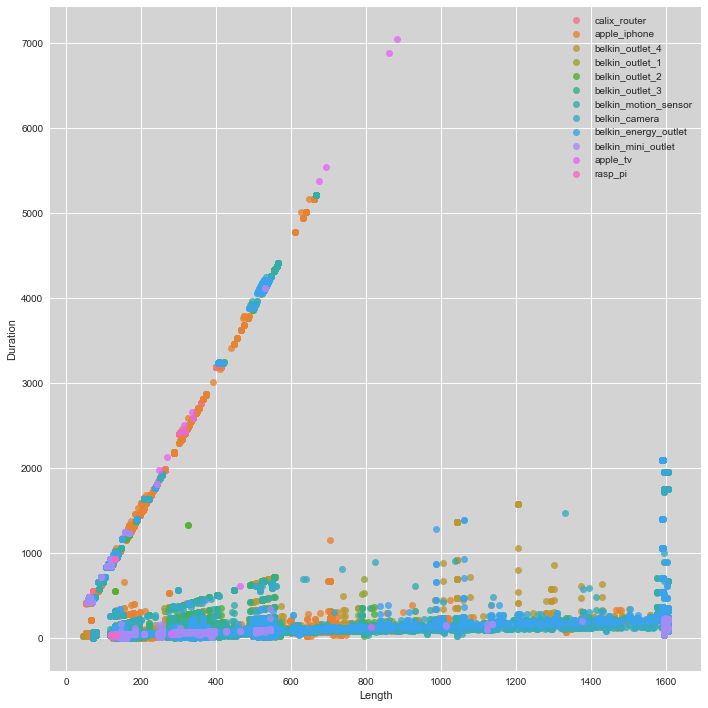

In [117]:
#Plot each device based on Length and Duration
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'white'})
sns.lmplot(data=wifi_df, x="Length", y="Duration", size=10, palette="husl", fit_reg=False, hue='Device', legend=False)
plt.legend(loc='upper right') 
plt.show()

## Step 4: Create training, validation and test sets

In [120]:
X_train_wifi, X_test_wifi, y_train_wifi, y_test_wifi = train_test_split(wifi_df.drop('Device', axis=1),
                                                    wifi_df['Device'], 
                                                    test_size=0.2,
                                                    random_state=1)

X_train_wifi, X_val_wifi, y_train_wifi, y_val_wifi = train_test_split(X_train_wifi,
                                                    y_train_wifi, 
                                                    test_size=0.2,
                                                    random_state=1)

## Step 5: Fit model

In [ ]:
#RandomForests
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(wifi_df.drop('Device', axis=1), wifi_df['Device'])